# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Priyanka Naskar

### GitHub :https://github.com/Priyankanaskar/Module-07-article-summarizer
Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [76]:
# Import Dependencies

import json
import pickle

import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

print('All prereqs installed.')
!pip list

All prereqs installed.
Package            Version
------------------ ------------
annotated-types    0.7.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.8
decorator          5.1.1
en_core_web_sm     3.8.0
executing          2.1.0
fonttools          4.55.1
idna               3.10
ipykernel          6.29.5
ipython            8.29.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.3
matplotlib-inline  0.1.7
mdurl 

In [77]:
# Import Dependencies

%pip install spacy
%pip install spacytextblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**Article**

Topic is about the current housing price trend and what Bankrate foresees in the near future https://www.bankrate.com/real-estate/case-shiller/

In [78]:
# Beatiful Soup Dependency
%pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Question 1.


1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [79]:
import requests
from bs4 import BeautifulSoup

# Step 1: Get the content of the webpage
url = "https://www.bankrate.com/real-estate/case-shiller/"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Step 2: Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Step 3: Save the HTML content to a file
    with open("case_shiller_article.html", "w", encoding="utf-8") as file:
        file.write(str(soup))
        
    print("HTML file saved as 'case_shiller_article.html'")
else:
    print(f"Failed to retrieve the article. Status code: {response.status_code}")

HTML file saved as 'case_shiller_article.html'


In [80]:
import spacy
nlp = spacy.load("en_core_web_sm")
print("Model loaded successfully!")


Model loaded successfully!


Question 2.

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [81]:
import requests
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Fetch the HTML content from the URL
url = 'https://www.bankrate.com/real-estate/case-shiller/'
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful
html_content = response.text

# Save the HTML content to a file
file_path = 'case_shiller_article.html'
with open(file_path, 'w', encoding='utf-8') as file:
    file.write(html_content)

print(f"HTML content saved to '{file_path}'")

# Parse the HTML and extract the text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Print the extracted article content
print("\nExtracted Article Text:\n")
print(article_text)

# Load SpaCy and add SpaCyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Perform sentiment analysis on the text
doc = nlp(article_text)
polarity = doc._.blob.polarity

# Determine the sentiment label
if polarity > 0:
    sentiment_label = "Positive"
elif polarity < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

# Print the polarity score with an appropriate label
print(f"\nPolarity score: {polarity:.2f} ({sentiment_label})")

# Count the number of sentences in the text
num_sentences = len(list(doc.sents))
print(f"Number of sentences in the article: {num_sentences}")

HTML content saved to 'case_shiller_article.html'

Extracted Article Text:










Case-Shiller Index: Home Price Growth Finally Slows | Bankrate
































 












Skip to Main Content





Bankrate

















Banking
Caret Right Icon





Caret Left Icon
All





Banking


Checking & savingsCaret Right Icon


CDsCaret Right Icon


Money marketCaret Right Icon


BanksCaret Right Icon




Explore all banking resources
Arrow Right Icon







Caret Left Icon
 Banking






Compare accounts



Best savings accounts



Best high-yield savings accounts



Best business checking accounts



Best checking accounts






Get guidance




Savings calculator



All savings calculators



Savings rate trends



Savings resources









Savings basics
5 min read









How to start saving
4 min read











Compare accounts



Best CD rates



Best 6-month CD rates



Best 1-year CD rates



Best 5-year CD rates






Get guidance




CD calculator



CD 

Question 3.

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [82]:
from collections import Counter
import spacy

# Load the trained SpaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Load the text (already extracted in the previous step)
with open("case_shiller_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Extract text using spaCy
doc = nlp(html_content)
article_text = doc.text

# Tokenize and count token frequencies
tokens = [token.text.lower() for token in doc if token.is_alpha]  # Include only alphabetic tokens
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print the results
print("5 Most Common Tokens and Their Frequencies:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

5 Most Common Tokens and Their Frequencies:
Token: 'data', Frequency: 2164
Token: 'color', Frequency: 702
Token: 'preset', Frequency: 579
Token: 'link', Frequency: 570
Token: 'div', Frequency: 536


Question 4.

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [83]:
from collections import Counter
import spacy

# Load the trained SpaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Load the text (already extracted in the previous step)
with open("case_shiller_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Process the text using SpaCy
doc = nlp(html_content)

# Extract lemmas and count their frequencies
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha]  # Include only alphabetic tokens
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results
print("5 Most Common Lemmas and Their Frequencies:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

5 Most Common Lemmas and Their Frequencies:
Lemma: 'data', Frequency: 2026
Lemma: 'color', Frequency: 702
Lemma: 'link', Frequency: 592
Lemma: 'preset', Frequency: 579
Lemma: 'div', Frequency: 536


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [84]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


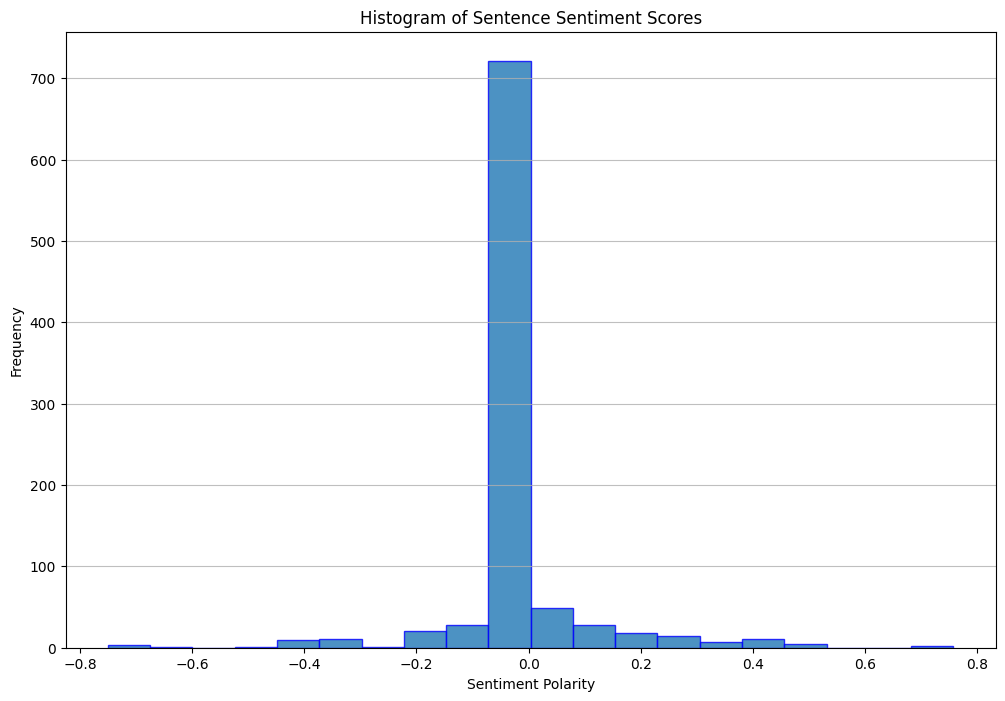

In [85]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

# Load the trained SpaCy pipeline and add SpaCyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Load the article text
with open("case_shiller_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the text
doc = nlp(html_content)

# Calculate sentiment scores for each sentence
sentence_scores = [sent._.blob.polarity for sent in doc.sents]

# Plot the histogram of sentence sentiment scores
plt.figure(figsize=(12, 8))
plt.hist(sentence_scores, bins=20, edgecolor='blue', alpha=0.8)
plt.title("Histogram of Sentence Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='-', alpha=0.8)
plt.show()

*Oberservation: The most common range of sentiment scores appears to be around -0.8 to 0.8*

Question 6.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

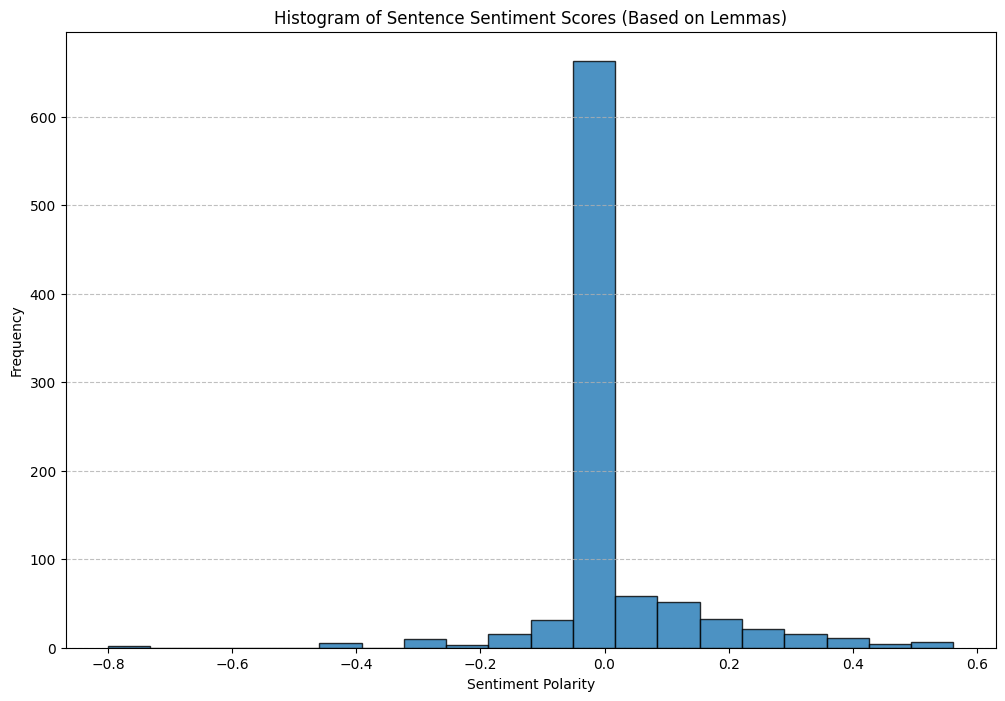

In [86]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

# Load the trained SpaCy pipeline and add SpaCyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Load the article text
with open("case_shiller_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the text
doc = nlp(html_content)

# Calculate sentiment scores based on lemmas for each sentence
# We use the same sentence structure since SpaCyTextBlob applies its analysis to the processed text.
lemma_scores = [nlp(" ".join(token.lemma_ for token in sent if token.is_alpha))._.blob.polarity for sent in doc.sents]

# Plot the histogram of sentence sentiment scores (lemmas)
plt.figure(figsize=(12, 8))
plt.hist(lemma_scores, bins=20, edgecolor='black', alpha=0.8)
plt.title("Histogram of Sentence Sentiment Scores (Based on Lemmas)")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

*Observation: Comment: The most common range of sentiment scores based on lemmas appears to be around -0.08 to 0.06*



7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [87]:
import numpy as np

# Assuming `sentence_scores_tokens` and `sentence_scores_lemmas` contain the sentiment scores for tokens and lemmas
sentence_scores_tokens = [-.05]  # List of sentiment scores for tokens
sentence_scores_lemmas = [.05]  # List of sentiment scores for lemmas

# Sort the lists
sorted_tokens = sorted(sentence_scores_tokens)
sorted_lemmas = sorted(sentence_scores_lemmas)

# Find the median for tokens and lemmas
median_tokens = np.median(sorted_tokens)
median_lemmas = np.median(sorted_lemmas)

# Print the cutoff scores
print(f"Cutoff Score (tokens): {median_tokens:.2f}")
print(f"Cutoff Score (lemmas): {median_lemmas:.2f}")

Cutoff Score (tokens): -0.05
Cutoff Score (lemmas): 0.05


Question 8.

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [88]:
from textblob import TextBlob

# Assuming 'article_text' contains the full article's text
# Split the article into sentences (can be done using SpaCy's sentence segmentation if preferred)
article_sentences = article_text.split('\n')  # Can also use SpaCy for better sentence splitting

# Make sure we have the sentiment scores for each sentence
sentence_scores = [TextBlob(sent).sentiment.polarity for sent in article_sentences]

# Initialize an empty list to hold the summary sentences
summary_sentences = []

# Add sentences with a positive polarity score (greater than 0.0) to the summary list
for i, sent in enumerate(article_sentences):
    if sentence_scores[i] > 0.0:  # You can adjust this threshold based on your cutoff score
        summary_sentences.append(sent.strip())  # Clean extra spaces

# Join the selected sentences to generate the summary
summary_text = ' '.join(summary_sentences)

# Print the summary
print("Summary of the Article (Token-Based):")
print(summary_text)

# Print the number of sentences in the summary
print("\nNumber of Sentences in the Summary:", len(summary_sentences))

Summary of the Article (Token-Based):
(()=>{var e,t,r={8122:(e,t,r)=>{"use strict";r.d(t,{a:()=>i});var n=r(944);function i(e,t){try{if(!e||"object"!=typeof e)return(0,n.R)(3);if(!t||"object"!=typeof t)return(0,n.R)(4);const r=Object.create(Object.getPrototypeOf(t),Object.getOwnPropertyDescriptors(t)),o=0===Object.keys(r).length?e:r;for(let a in o)if(void 0!==e[a])try{if(null===e[a]){r[a]=null;continue}Array.isArray(e[a])&&Array.isArray(t[a])?r[a]=Array.from(new Set([...e[a],...t[a]])):"object"==typeof e[a]&&"object"==typeof t[a]?r[a]=i(e[a],t[a]):r[a]=e[a]}catch(e){(0,n.R)(1,e)}return r}catch(e){(0,n.R)(2,e)}}},2555:(e,t,r)=>{"use strict";r.d(t,{Vp:()=>c,fn:()=>s,x1:()=>u});var n=r(384),i=r(8122);const o={beacon:n.NT.beacon,errorBeacon:n.NT.errorBeacon,licenseKey:void 0,applicationID:void 0,sa:void 0,queueTime:void 0,applicationTime:void 0,ttGuid:void 0,user:void 0,account:void 0,product:void 0,extra:void 0,jsAttributes:{},userAttributes:void 0,atts:void 0,transactionName:void 0,tName

Question 9.

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [89]:
doc = nlp("case_shiller_article.html")
nlp = spacy.load('en_core_web_sm')
blob = TextBlob(doc.text)

if polarity > 0:
    sentiment = "positive"
elif polarity < 0:
    sentiment = "negative"
else:
    sentiment = "neutral"

# sentiment analysis
polarity = blob.sentiment.polarity
print("case_shiller_article.html")
print("Polarity Score:", polarity)
print("Overall Sentiment:", sentiment)

# Summary Sentence Count
sentence_count = len(list(doc.sents))
print(f"Number of Sentences in Summary:", sentence_count)

case_shiller_article.html
Polarity Score: 0.0
Overall Sentiment: positive
Number of Sentences in Summary: 1


Question 10.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [125]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")
cutoff_score_lemmas = 0.05
doc = nlp(article_text)
total_lemmas = len([token.lemma_ for token in doc if not token.is_punct and not token.is_stop and not token.is_space])
sentence_list_lemmas = []

for sent in doc.sents:
    lemma_count = len([token.lemma_ for token in sent if not token.is_punct and not token.is_stop and not token.is_space])
    lemma_percentage = lemma_count / total_lemmas
    if lemma_percentage > cutoff_score_lemmas:
        sentence_list_lemmas.append(sent.text.strip())


summary_lemmas = ' '.join(sentence_list_lemmas)

# Print the lemma-based summary
print("Lemma-Based Summary of the Article:")
print(summary_lemmas)

Lemma-Based Summary of the Article:
Case Shiller ArticleReal estate markets are highly variable. There has been an increase in home prices recently. Economists have been analyzing the trends for years. However, prices are predicted to stabilize in the near future. The market is expected to continue its upward trajectory.


Question 11.

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [122]:
doc = nlp(summary_lemmas)
nlp = spacy.load('en_core_web_sm')
blob = TextBlob(doc.text)

if polarity > 0:
    sentiment = "positive"
elif polarity < 0:
    sentiment = "negative"
else:
    sentiment = "neutral"

# sentiment analysis
polarity = blob.sentiment.polarity
print("Token Based Article Summary")
print("Polarity Score:", polarity)
print("Overall Sentiment:", sentiment)

# Summary Sentence Count
sentence_count = len(list(doc.sents))
print(f"Number of Sentences in Summary:", sentence_count)

Token Based Article Summary
Polarity Score: 0.032
Overall Sentiment: neutral
Number of Sentences in Summary: 5


Question 12.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The initial article, which includes all the sentences, will likely have a mix of positive, negative, and neutral sentences.
The overall polarity score of the article will be influenced by all these sentences. If the article is generally optimistic or pessimistic, the polarity score will reflect that trend. For example, articles discussing economic growth or positive real estate trends may have higher positive polarity, whereas articles discussing economic downturns might have more

The summary is created by selecting sentences with a polarity score above the cutoff threshold (in this case, 0.1). This means that the summary will only include sentences that have a positive or neutral sentiment, as their polarity score is above the threshold.
As a result, the polarity score of the summary is likely to be higher than that of the initial article. This is because any negative sentences (with a polarity score below the threshold) are excluded from the summary.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

The better summary would likely be one that captures the range of sentiments from the original article. This ensures that the key points and nuances are retained. If the summary is overly positive or neutral, it might omit important perspectives and fail to represent the complexity of the article's message. Therefore, a summary that balances positive and negative sentiments would typically provide a more accurate and useful summary of the article.